In [1]:
%%time
import time
start_time = time.time()
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import csv

pd.set_option('display.max_columns', None)



CPU times: total: 6.03 s
Wall time: 7.64 s


In [2]:
# Load the dataset
#data = pd.read_csv("./Data_ADNIMerge_procssedNeuroImaging.csv")

In [3]:
#data.head()

In [4]:
# Check the shape of the complete datasets
#data.shape

In [5]:
#View the columns of the datasets
#data.columns

In [6]:
"""# Function to induce MAR based on a predictor
def induce_mar(data, predictor, targets):
    threshold = data[predictor].median()
    for target in targets:
        if predictor == 'PTGENDER':
            mask = (data[predictor] == data[predictor].unique()[0])
        else:
            mask = (data[predictor] > threshold)
        
        indices = data[mask].index
        missing_indices = np.random.choice(indices, size=int(1 * len(indices)), replace=False)
        data.loc[missing_indices, target] = np.nan

# Induce missingness based on 'Age'
induce_mar(data, 'AGE', ['MMSE', 'CSF'])

# Induce missingness based on 'PTGENDER'
induce_mar(data, 'PTGENDER', ['FATHDEM'])

# Display the first few rows with induced missingness
data.head()"""


"# Function to induce MAR based on a predictor\ndef induce_mar(data, predictor, targets):\n    threshold = data[predictor].median()\n    for target in targets:\n        if predictor == 'PTGENDER':\n            mask = (data[predictor] == data[predictor].unique()[0])\n        else:\n            mask = (data[predictor] > threshold)\n        \n        indices = data[mask].index\n        missing_indices = np.random.choice(indices, size=int(1 * len(indices)), replace=False)\n        data.loc[missing_indices, target] = np.nan\n\n# Induce missingness based on 'Age'\ninduce_mar(data, 'AGE', ['MMSE', 'CSF'])\n\n# Induce missingness based on 'PTGENDER'\ninduce_mar(data, 'PTGENDER', ['FATHDEM'])\n\n# Display the first few rows with induced missingness\ndata.head()"

In [7]:
#data.head()

In [8]:
#data.shape

In [9]:
#data.isna().sum()

In [10]:
#data.to_csv('adni_mar.csv')

In [11]:
# Load the dataset
data = pd.read_csv("./adni_mar.csv")

In [12]:
# Split the data into complete and incomplete datasets
complete_data = data.dropna()
incomplete_data = data[data.isnull().any(axis=1)].copy()

In [13]:
incomplete_data.head()

,Unnamed: 0,RID,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,lh.Amygdala,CSF,lh.Accumbens.area,lh.VentralDC,lh.choroid.plexus,rh.Cerebellum.White.Matter,rh.Cerebellum.Cortex,rh.Thalamus.Proper,rh.Caudate,rh.Putamen,rh.Pallidum,rh.Hippocampus,rh.Amygdala,rh.Accumbens.area,rh.VentralDC,rh.choroid.plexus,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,ctx.lh.unknown,ctx.lh.bankssts,ctx.lh.caudalanteriorcingulate,ctx.lh.caudalmiddlefrontal,ctx.lh.corpuscallosum,ctx.lh.cuneus,ctx.lh.entorhinal,ctx.lh.fusiform,ctx.lh.inferiorparietal,ctx.lh.inferiortemporal,ctx.lh.isthmuscingulate,ctx.lh.lateraloccipital,ctx.lh.lateralorbitofrontal,ctx.lh.lingual,ctx.lh.medialorbitofrontal,ctx.lh.middletemporal,ctx.lh.parahippocampal,ctx.lh.paracentral,ctx.lh.parsopercularis,ctx.lh.parsorbitalis,ctx.lh.parstriangularis,ctx.lh.pericalcarine,ctx.lh.postcentral,ctx.lh.posteriorcingulate,ctx.lh.precentral,ctx.lh.precuneus,ctx.lh.rostralanteriorcingulate,ctx.lh.rostralmiddlefrontal,ctx.lh.superiorfrontal,ctx.lh.superiorparietal,ctx.lh.superiortemporal,ctx.lh.supramarginal,ctx.lh.frontalpole,ctx.lh.temporalpole,ctx.lh.transversetemporal,ctx.lh.insula,ctx.rh.unknown,ctx.rh.bankssts,ctx.rh.caudalanteriorcingulate,ctx.rh.caudalmiddlefrontal,ctx.rh.corpuscallosum,ctx.rh.cuneus,ctx.rh.entorhinal,ctx.rh.fusiform,ctx.rh.inferiorparietal,ctx.rh.inferiortemporal,ctx.rh.isthmuscingulate,ctx.rh.lateraloccipital,ctx.rh.lateralorbitofrontal,ctx.rh.lingual,ctx.rh.medialorbitofrontal,ctx.rh.middletemporal,ctx.rh.parahippocampal,ctx.rh.paracentral,ctx.rh.parsopercularis,ctx.rh.parsorbitalis,ctx.rh.parstriangularis,ctx.rh.pericalcarine,ctx.rh.postcentral,ctx.rh.posteriorcingulate,ctx.rh.precentral,ctx.rh.precuneus,ctx.rh.rostralanteriorcingulate,ctx.rh.rostralmiddlefrontal,ctx.rh.superiorfrontal,ctx.rh.superiorparietal,ctx.rh.superiortemporal,ctx.rh.supramarginal,ctx.rh.frontalpole,ctx.rh.temporalpole,ctx.rh.transversetemporal,ctx.rh.insula,wm.lh.bankssts,wm.lh.caudalanteriorcingulate,wm.lh.caudalmiddlefrontal,wm.lh.corpuscallosum,wm.lh.cuneus,wm.lh.entorhinal,wm.lh.fusiform,wm.lh.inferiorparietal,wm.lh.inferiortemporal,wm.lh.isthmuscingulate,wm.lh.lateraloccipital,wm.lh.lateralorbitofrontal,wm.lh.lingual,wm.lh.medialorbitofrontal,wm.lh.middletemporal,wm.lh.parahippocampal,wm.lh.paracentral,wm.lh.parsopercularis,wm.lh.parsorbitalis,wm.lh.parstriangularis,wm.lh.pericalcarine,wm.lh.postcentral,wm.lh.posteriorcingulate,wm.lh.precentral,wm.lh.precuneus,wm.lh.rostralanteriorcingulate,wm.lh.rostralmiddlefrontal,wm.lh.superiorfrontal,wm.lh.superiorparietal,wm.lh.superiortemporal,wm.lh.supramarginal,wm.lh.frontalpole,wm.lh.temporalpole,wm.lh.transversetemporal,wm.lh.insula,wm.rh.bankssts,wm.rh.caudalanteriorcingulate,wm.rh.caudalmiddlefrontal,wm.rh.corpuscallosum,wm.rh.cuneus,wm.rh.entorhinal,wm.rh.fusiform,wm.rh.inferiorparietal,wm.rh.inferiortemporal,wm.rh.isthmuscingulate,wm.rh.lateraloccipital,wm.rh.lateralorbitofrontal,wm.rh.lingual,wm.rh.medialorbitofrontal,wm.rh.middletemporal,wm.rh.parahippocampal,wm.rh.paracentral,wm.rh.parsopercularis,wm.rh.parsorbitalis,wm.rh.parstriangularis,wm.rh.pericalcarine,wm.rh.postcentral,wm.rh.posteriorcingulate,wm.rh.precentral,wm.rh.precuneus,wm.rh.rostralanteriorcingulate,wm.rh.rostralmiddlefrontal,wm.rh.superiorfrontal,wm.rh.superiorparietal,wm.rh.superiortemporal,wm.rh.supramarginal,wm.rh.frontalpole,wm.rh.temporalpole,wm.rh.transversetemporal,wm.rh.insula,wm.lh.Unsegmented,wm.rh.Unsegmented,AGE,PTGENDER,PTEDUCAT,PHC_MEM,PHC_EXF,PHC_LAN,AD_LABEL,ADAS_TOTAL,CBB_SCORE_.,CDR,MMSE,MODHACH_SCORE,NPITOTAL,LOG_MEM_IMM_TOTAL,LOG_MEM_DEL_TOTAL,COMP_MEM_SCORE,COMP_EXEC_FUNC_SCORE,MOTHDEM,FATHDEM,GDTOTAL,NPIATOT,NPIBTOT,NPICTOT,NPIDTOT,NPIETOT,NPIFTOT,NPIGTOT,NPIHTOT,NPIITOT,NPIJTOT,NPIKTOT,NPILTOT,adas_Q4SCORE,adas_Q1SCORE,adas_Q2SCORE,adas_Q3SCORE,adas_Q5SCORE,adas_Q6SCORE,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_

In [14]:
incomplete_data.shape

(444, 225)

In [15]:
complete_data.shape

(115, 225)

In [16]:
# Normalize the complete dataset
scaler = MinMaxScaler()
scaled_complete_data = scaler.fit_transform(complete_data)


In [17]:
# Split the complete data into training and testing sets
X_train, X_test = train_test_split(scaled_complete_data, test_size=0.2, random_state=42)


In [18]:
# Define the Denoising Autoencoder
input_dim = X_train.shape[1]


In [19]:
encoding_dim = 32  # The size of the middle hidden layer

In [20]:
input_layer = Input(shape=(input_dim,))
encoder_hidden_1 = Dense(128, activation='relu')(input_layer)
encoder_hidden_2 = Dense(encoding_dim, activation='relu')(encoder_hidden_1)
encoder = Model(input_layer, encoder_hidden_2)

decoder_input = Input(shape=(encoding_dim,))
decoder_hidden_1 = Dense(128, activation='relu')(decoder_input)
decoder_output = Dense(input_dim, activation='sigmoid')(decoder_hidden_1)
decoder = Model(decoder_input, decoder_output)

In [21]:
# Create the full autoencoder
autoencoder_output = decoder(encoder(input_layer))
autoencoder = Model(input_layer, autoencoder_output)

In [22]:
# Compile the autoencoder
autoencoder.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [24]:
%%time
# Train the autoencoder
history = autoencoder.fit(
    X_train + 0.1 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape), # add noise
    X_train,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping]
)

Epoch 1/100
3/3 [==============================] - 1s 115ms/step - loss: 0.1291 - val_loss: 0.1218
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1199 - val_loss: 0.1105
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.1048 - val_loss: 0.0946
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0859 - val_loss: 0.0778
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0660 - val_loss: 0.0640
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0508 - val_loss: 0.0553
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0413 - val_loss: 0.0509
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0365 - val_loss: 0.0483
Epoch 9/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0340 - val_loss: 0.0463
Epoch 10/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0322 - val_loss: 0.0440
Epoch 11/100
3/3 [

Epoch 84/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0070 - val_loss: 0.0187
Epoch 85/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0070 - val_loss: 0.0186
Epoch 86/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0069 - val_loss: 0.0187
Epoch 87/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0068 - val_loss: 0.0185
Epoch 88/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0067 - val_loss: 0.0186
Epoch 89/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0067 - val_loss: 0.0187
Epoch 90/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0066 - val_loss: 0.0186
Epoch 91/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0065 - val_loss: 0.0187
Epoch 92/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0065 - val_loss: 0.0185
Epoch 93/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0064 - val_loss: 0.0187
Epoch 94/1

In [25]:
%%time
# Replace the NaNs in the incomplete data with a temporary placeholder value before scaling
scaled_incomplete_data = scaler.transform(incomplete_data.fillna(-999))

CPU times: total: 15.6 ms
Wall time: 16 ms


In [26]:
%%time
# Use the trained autoencoder to predict the missing values
predicted_data = autoencoder.predict(scaled_incomplete_data)

14/14 [==============================] - 0s 2ms/step
CPU times: total: 250 ms
Wall time: 222 ms


In [27]:
%%time
# Replace the placeholder values with the predicted ones
nan_cols = incomplete_data.columns[incomplete_data.isna().any()].tolist()
for col in nan_cols:
    missing_index = incomplete_data[col].isna()
    incomplete_data.loc[missing_index, col] = scaler.inverse_transform(predicted_data)[missing_index, data.columns.get_loc(col)]

CPU times: total: 0 ns
Wall time: 10 ms


In [28]:
# Combine the complete and incomplete data back together
data = pd.concat([complete_data, incomplete_data])

In [29]:
data.head()

,Unnamed: 0,RID,lh.Cerebellum.White.Matter,lh.Cerebellum.Cortex,lh.Thalamus.Proper,lh.Caudate,lh.Putamen,lh.Pallidum,X3rd.Ventricle,X4th.Ventricle,Brain.Stem,lh.Hippocampus,lh.Amygdala,CSF,lh.Accumbens.area,lh.VentralDC,lh.choroid.plexus,rh.Cerebellum.White.Matter,rh.Cerebellum.Cortex,rh.Thalamus.Proper,rh.Caudate,rh.Putamen,rh.Pallidum,rh.Hippocampus,rh.Amygdala,rh.Accumbens.area,rh.VentralDC,rh.choroid.plexus,CC_Posterior,CC_Mid_Posterior,CC_Central,CC_Mid_Anterior,CC_Anterior,ctx.lh.unknown,ctx.lh.bankssts,ctx.lh.caudalanteriorcingulate,ctx.lh.caudalmiddlefrontal,ctx.lh.corpuscallosum,ctx.lh.cuneus,ctx.lh.entorhinal,ctx.lh.fusiform,ctx.lh.inferiorparietal,ctx.lh.inferiortemporal,ctx.lh.isthmuscingulate,ctx.lh.lateraloccipital,ctx.lh.lateralorbitofrontal,ctx.lh.lingual,ctx.lh.medialorbitofrontal,ctx.lh.middletemporal,ctx.lh.parahippocampal,ctx.lh.paracentral,ctx.lh.parsopercularis,ctx.lh.parsorbitalis,ctx.lh.parstriangularis,ctx.lh.pericalcarine,ctx.lh.postcentral,ctx.lh.posteriorcingulate,ctx.lh.precentral,ctx.lh.precuneus,ctx.lh.rostralanteriorcingulate,ctx.lh.rostralmiddlefrontal,ctx.lh.superiorfrontal,ctx.lh.superiorparietal,ctx.lh.superiortemporal,ctx.lh.supramarginal,ctx.lh.frontalpole,ctx.lh.temporalpole,ctx.lh.transversetemporal,ctx.lh.insula,ctx.rh.unknown,ctx.rh.bankssts,ctx.rh.caudalanteriorcingulate,ctx.rh.caudalmiddlefrontal,ctx.rh.corpuscallosum,ctx.rh.cuneus,ctx.rh.entorhinal,ctx.rh.fusiform,ctx.rh.inferiorparietal,ctx.rh.inferiortemporal,ctx.rh.isthmuscingulate,ctx.rh.lateraloccipital,ctx.rh.lateralorbitofrontal,ctx.rh.lingual,ctx.rh.medialorbitofrontal,ctx.rh.middletemporal,ctx.rh.parahippocampal,ctx.rh.paracentral,ctx.rh.parsopercularis,ctx.rh.parsorbitalis,ctx.rh.parstriangularis,ctx.rh.pericalcarine,ctx.rh.postcentral,ctx.rh.posteriorcingulate,ctx.rh.precentral,ctx.rh.precuneus,ctx.rh.rostralanteriorcingulate,ctx.rh.rostralmiddlefrontal,ctx.rh.superiorfrontal,ctx.rh.superiorparietal,ctx.rh.superiortemporal,ctx.rh.supramarginal,ctx.rh.frontalpole,ctx.rh.temporalpole,ctx.rh.transversetemporal,ctx.rh.insula,wm.lh.bankssts,wm.lh.caudalanteriorcingulate,wm.lh.caudalmiddlefrontal,wm.lh.corpuscallosum,wm.lh.cuneus,wm.lh.entorhinal,wm.lh.fusiform,wm.lh.inferiorparietal,wm.lh.inferiortemporal,wm.lh.isthmuscingulate,wm.lh.lateraloccipital,wm.lh.lateralorbitofrontal,wm.lh.lingual,wm.lh.medialorbitofrontal,wm.lh.middletemporal,wm.lh.parahippocampal,wm.lh.paracentral,wm.lh.parsopercularis,wm.lh.parsorbitalis,wm.lh.parstriangularis,wm.lh.pericalcarine,wm.lh.postcentral,wm.lh.posteriorcingulate,wm.lh.precentral,wm.lh.precuneus,wm.lh.rostralanteriorcingulate,wm.lh.rostralmiddlefrontal,wm.lh.superiorfrontal,wm.lh.superiorparietal,wm.lh.superiortemporal,wm.lh.supramarginal,wm.lh.frontalpole,wm.lh.temporalpole,wm.lh.transversetemporal,wm.lh.insula,wm.rh.bankssts,wm.rh.caudalanteriorcingulate,wm.rh.caudalmiddlefrontal,wm.rh.corpuscallosum,wm.rh.cuneus,wm.rh.entorhinal,wm.rh.fusiform,wm.rh.inferiorparietal,wm.rh.inferiortemporal,wm.rh.isthmuscingulate,wm.rh.lateraloccipital,wm.rh.lateralorbitofrontal,wm.rh.lingual,wm.rh.medialorbitofrontal,wm.rh.middletemporal,wm.rh.parahippocampal,wm.rh.paracentral,wm.rh.parsopercularis,wm.rh.parsorbitalis,wm.rh.parstriangularis,wm.rh.pericalcarine,wm.rh.postcentral,wm.rh.posteriorcingulate,wm.rh.precentral,wm.rh.precuneus,wm.rh.rostralanteriorcingulate,wm.rh.rostralmiddlefrontal,wm.rh.superiorfrontal,wm.rh.superiorparietal,wm.rh.superiortemporal,wm.rh.supramarginal,wm.rh.frontalpole,wm.rh.temporalpole,wm.rh.transversetemporal,wm.rh.insula,wm.lh.Unsegmented,wm.rh.Unsegmented,AGE,PTGENDER,PTEDUCAT,PHC_MEM,PHC_EXF,PHC_LAN,AD_LABEL,ADAS_TOTAL,CBB_SCORE_.,CDR,MMSE,MODHACH_SCORE,NPITOTAL,LOG_MEM_IMM_TOTAL,LOG_MEM_DEL_TOTAL,COMP_MEM_SCORE,COMP_EXEC_FUNC_SCORE,MOTHDEM,FATHDEM,GDTOTAL,NPIATOT,NPIBTOT,NPICTOT,NPIDTOT,NPIETOT,NPIFTOT,NPIGTOT,NPIHTOT,NPIITOT,NPIJTOT,NPIKTOT,NPILTOT,adas_Q4SCORE,adas_Q1SCORE,adas_Q2SCORE,adas_Q3SCORE,adas_Q5SCORE,adas_Q6SCORE,adas_Q7SCORE,adas_Q8SCORE,adas_Q9SCORE,adas_

In [36]:
data.to_csv('adni_mar_imputed.csv')

In [31]:

# Print the training and validation MSE
print("Training MSE: ", history.history['loss'])
print("Validation MSE: ", history.history['val_loss'])


Training MSE:  [0.12906186282634735, 0.11987583339214325, 0.1048273965716362, 0.08590123057365417, 0.0660390555858612, 0.05076521262526512, 0.04128476232290268, 0.03653275594115257, 0.0340125598013401, 0.032210204750299454, 0.03051563911139965, 0.029024548828601837, 0.027196135371923447, 0.025755029171705246, 0.024217968806624413, 0.023121362552046776, 0.02226383239030838, 0.02176901139318943, 0.021378161385655403, 0.020968062803149223, 0.020544910803437233, 0.020091727375984192, 0.019631290808320045, 0.019272372126579285, 0.018804926425218582, 0.01838558167219162, 0.018036238849163055, 0.01753329113125801, 0.01718371920287609, 0.01681959070265293, 0.016472958028316498, 0.016110671684145927, 0.015826111659407616, 0.015514847822487354, 0.01521200593560934, 0.01491247396916151, 0.01463052537292242, 0.014365162700414658, 0.01414906419813633, 0.01388520561158657, 0.01366236712783575, 0.013418205082416534, 0.013219338841736317, 0.012991133145987988, 0.012773544527590275, 0.01257039140909910

In [32]:
# Calculate the average training and validation MSE
avg_training_mse = np.mean(history.history['loss'])
avg_validation_mse = np.mean(history.history['val_loss'])

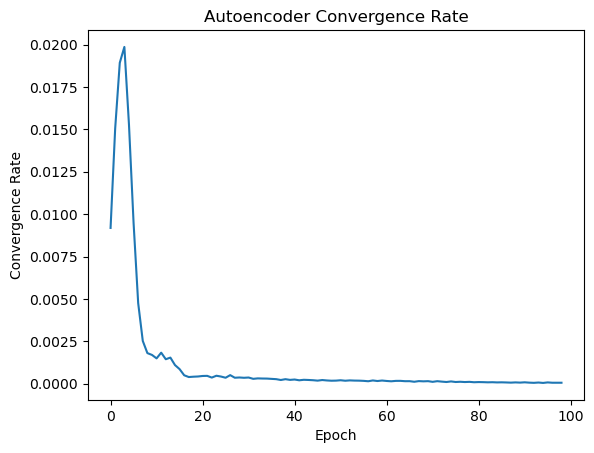

In [33]:
# Get the reconstruction losses
reconstruction_losses = history.history['loss']

# Calculate the convergence rate
convergence_rate = []
for i in range(1, len(reconstruction_losses)):
    convergence_rate.append(reconstruction_losses[i - 1] - reconstruction_losses[i])

# Plot the convergence rate
plt.plot(convergence_rate)
plt.xlabel("Epoch")
plt.ylabel("Convergence Rate")
plt.title("Autoencoder Convergence Rate")
plt.show()

In [34]:
end_time = time.time()
elapsed_time = end_time - start_time

### REPORT

In [35]:
# Print the averages
print("Average training MSE: ", avg_training_mse)
print("Average validation MSE: ", avg_validation_mse)
print(f"Elapsed time for the code to run: {elapsed_time} seconds")

Average training MSE:  0.01822225300129503
Average validation MSE:  0.02656540561467409
Elapsed time for the code to run: 15.955263614654541 seconds
